0.022848327032195172
    time,      [A],      [B],     [AB],      [C],      [BC],     [ABC]
 [[    0,        1,        1,        0,        1,         0,         0],
  [    1, 0.722705, 0.694767, 0.255339, 0.950106, 0.0279375, 0.0219566],
  [    2, 0.714506, 0.685409, 0.262674, 0.948083, 0.0290971, 0.0228198],
  [    3, 0.714242, 0.685109,  0.26291, 0.948019, 0.0291339, 0.0228474],
  [    4, 0.714234, 0.685099, 0.262918, 0.948017,  0.029135, 0.0228483],
  [    5, 0.714234, 0.685099, 0.262918, 0.948017, 0.0291351, 0.0228483],
  [    6, 0.714234, 0.685098, 0.262918, 0.948017, 0.0291351, 0.0228483],
  [    7, 0.714234, 0.685099, 0.262918, 0.948017, 0.0291351, 0.0228483],
  [    8, 0.714234, 0.685099, 0.262918, 0.948017, 0.0291351, 0.0228483],
  [    9, 0.714234, 0.685099, 0.262918, 0.948017, 0.0291351, 0.0228483],
  [   10, 0.714234, 0.685099, 0.262918, 0.948017, 0.0291351, 0.0228483],
  [   11, 0.714234, 0.685099, 0.262918, 0.948017, 0.0291351, 0.0228483],
  [   12, 0.714234, 0.685099, 0.

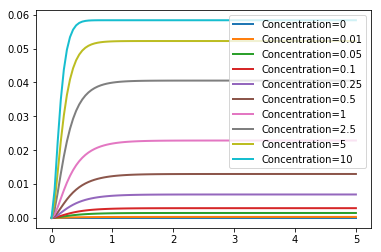

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul  3 15:04:56 2019
@author: LEGION-JCWP
"""

import tellurium as te
import roadrunner
""" This model assumes that K_AB > A_total and that """


r = te.loada("""
J0: A + B -> AB ; K_AB * A * B - 1/K_AB * AB
J1: B + C -> BC ; K_BC * B * C - 1/K_BC * BC
J4: AB + C -> ABC ; K_AB_C * AB * C - 1/K_AB_C * ABC
J5: BC + A -> ABC ; K_BC_A * BC * A - 1/K_BC_A * ABC
# *******************************
# Parameters
A = 1;
B = 1;
C = 1;
K_AB = 1;
K_BC = 0.1;
K_AB_C = 1;
K_BC_A = 0.1;
""")

simulation = r.simulate(start=0, end=100, steps=100)
r.plot(simulation)
print(simulation[100,6])
print(simulation)

concentrations =  [0, 0.01, 0.05, 0.1, 0.25, 0.5, 1, 2.5, 5, 10]

for i in concentrations:
    r.resetToOrigin()
    r.B = i
    m = r.simulate(0, 5, 100, ['time', 'ABC'])
    print(m)
    te.plotArray (m, show=False, labels = ['Concentration=' + str(i)], resetColorCycle = False)
